### Package

In [82]:
from dateutil.parser import
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
plt.rcParams.update({'figure.figsize': (10, 7), 'figure.dpi': 120})
mpl.style.use('classic')
#plt.style.use('fivethirtyeight')
#plt.style.use('dark_background')

### so that u dont have warnings
#from warnings import filterwarnings
#filterwarnings('ignore')

### Read source file

In [67]:
df_Covid = pd.read_excel('DataFrame_CovidIndonesia.xlsx')

### Check the data in source file

In [68]:
# Checking data null
print(df_Covid.isnull().sum())
print(df_Covid.info())

No                      0
key_as_string           0
jumlah_meninggal        0
jumlah_sembuh           0
jumlah_positif          0
jumlah_dirawat          0
jumlah_positif_kum      0
jumlah_sembuh_kum       0
jumlah_meninggal_kum    0
jumlah_dirawat_kum      0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590 entries, 0 to 589
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   No                    590 non-null    int64 
 1   key_as_string         590 non-null    object
 2   jumlah_meninggal      590 non-null    int64 
 3   jumlah_sembuh         590 non-null    int64 
 4   jumlah_positif        590 non-null    int64 
 5   jumlah_dirawat        590 non-null    int64 
 6   jumlah_positif_kum    590 non-null    int64 
 7   jumlah_sembuh_kum     590 non-null    int64 
 8   jumlah_meninggal_kum  590 non-null    int64 
 9   jumlah_dirawat_kum    590 non-null    int64 
dtypes: int64(9), obje

### Parse 'key_as_string' to datetime

In [75]:
ser = pd.read_excel('DataFrame_CovidIndonesia.xlsx', parse_dates=['key_as_string'], index_col='key_as_string')
ser.head()

,No,jumlah_meninggal,jumlah_sembuh,jumlah_positif,jumlah_dirawat,jumlah_positif_kum,jumlah_sembuh_kum,jumlah_meninggal_kum,jumlah_dirawat_kum
key_as_string,,,,,,,,,
2020-03-02 00:00:00+00:00,0,0,0,2,2,2,0,0,2
2020-03-03 00:00:00+00:00,1,0,0,0,0,2,0,0,2
2020-03-04 00:00:00+00:00,2,0,0,0,0,2,0,0,2
2020-03-05 00:00:00+00:00,3,0,0,0,0,2,0,0,2
2020-03-06 00:00:00+00:00,4,0,0,2,2,4,0,0,4


In [76]:
df_Covid.dtypes

No                                    int64
key_as_string           datetime64[ns, UTC]
jumlah_meninggal                      int64
jumlah_sembuh                         int64
jumlah_positif                        int64
jumlah_dirawat                        int64
jumlah_positif_kum                    int64
jumlah_sembuh_kum                     int64
jumlah_meninggal_kum                  int64
jumlah_dirawat_kum                    int64
dtype: object

### Vizualization the data

<AxesSubplot:>

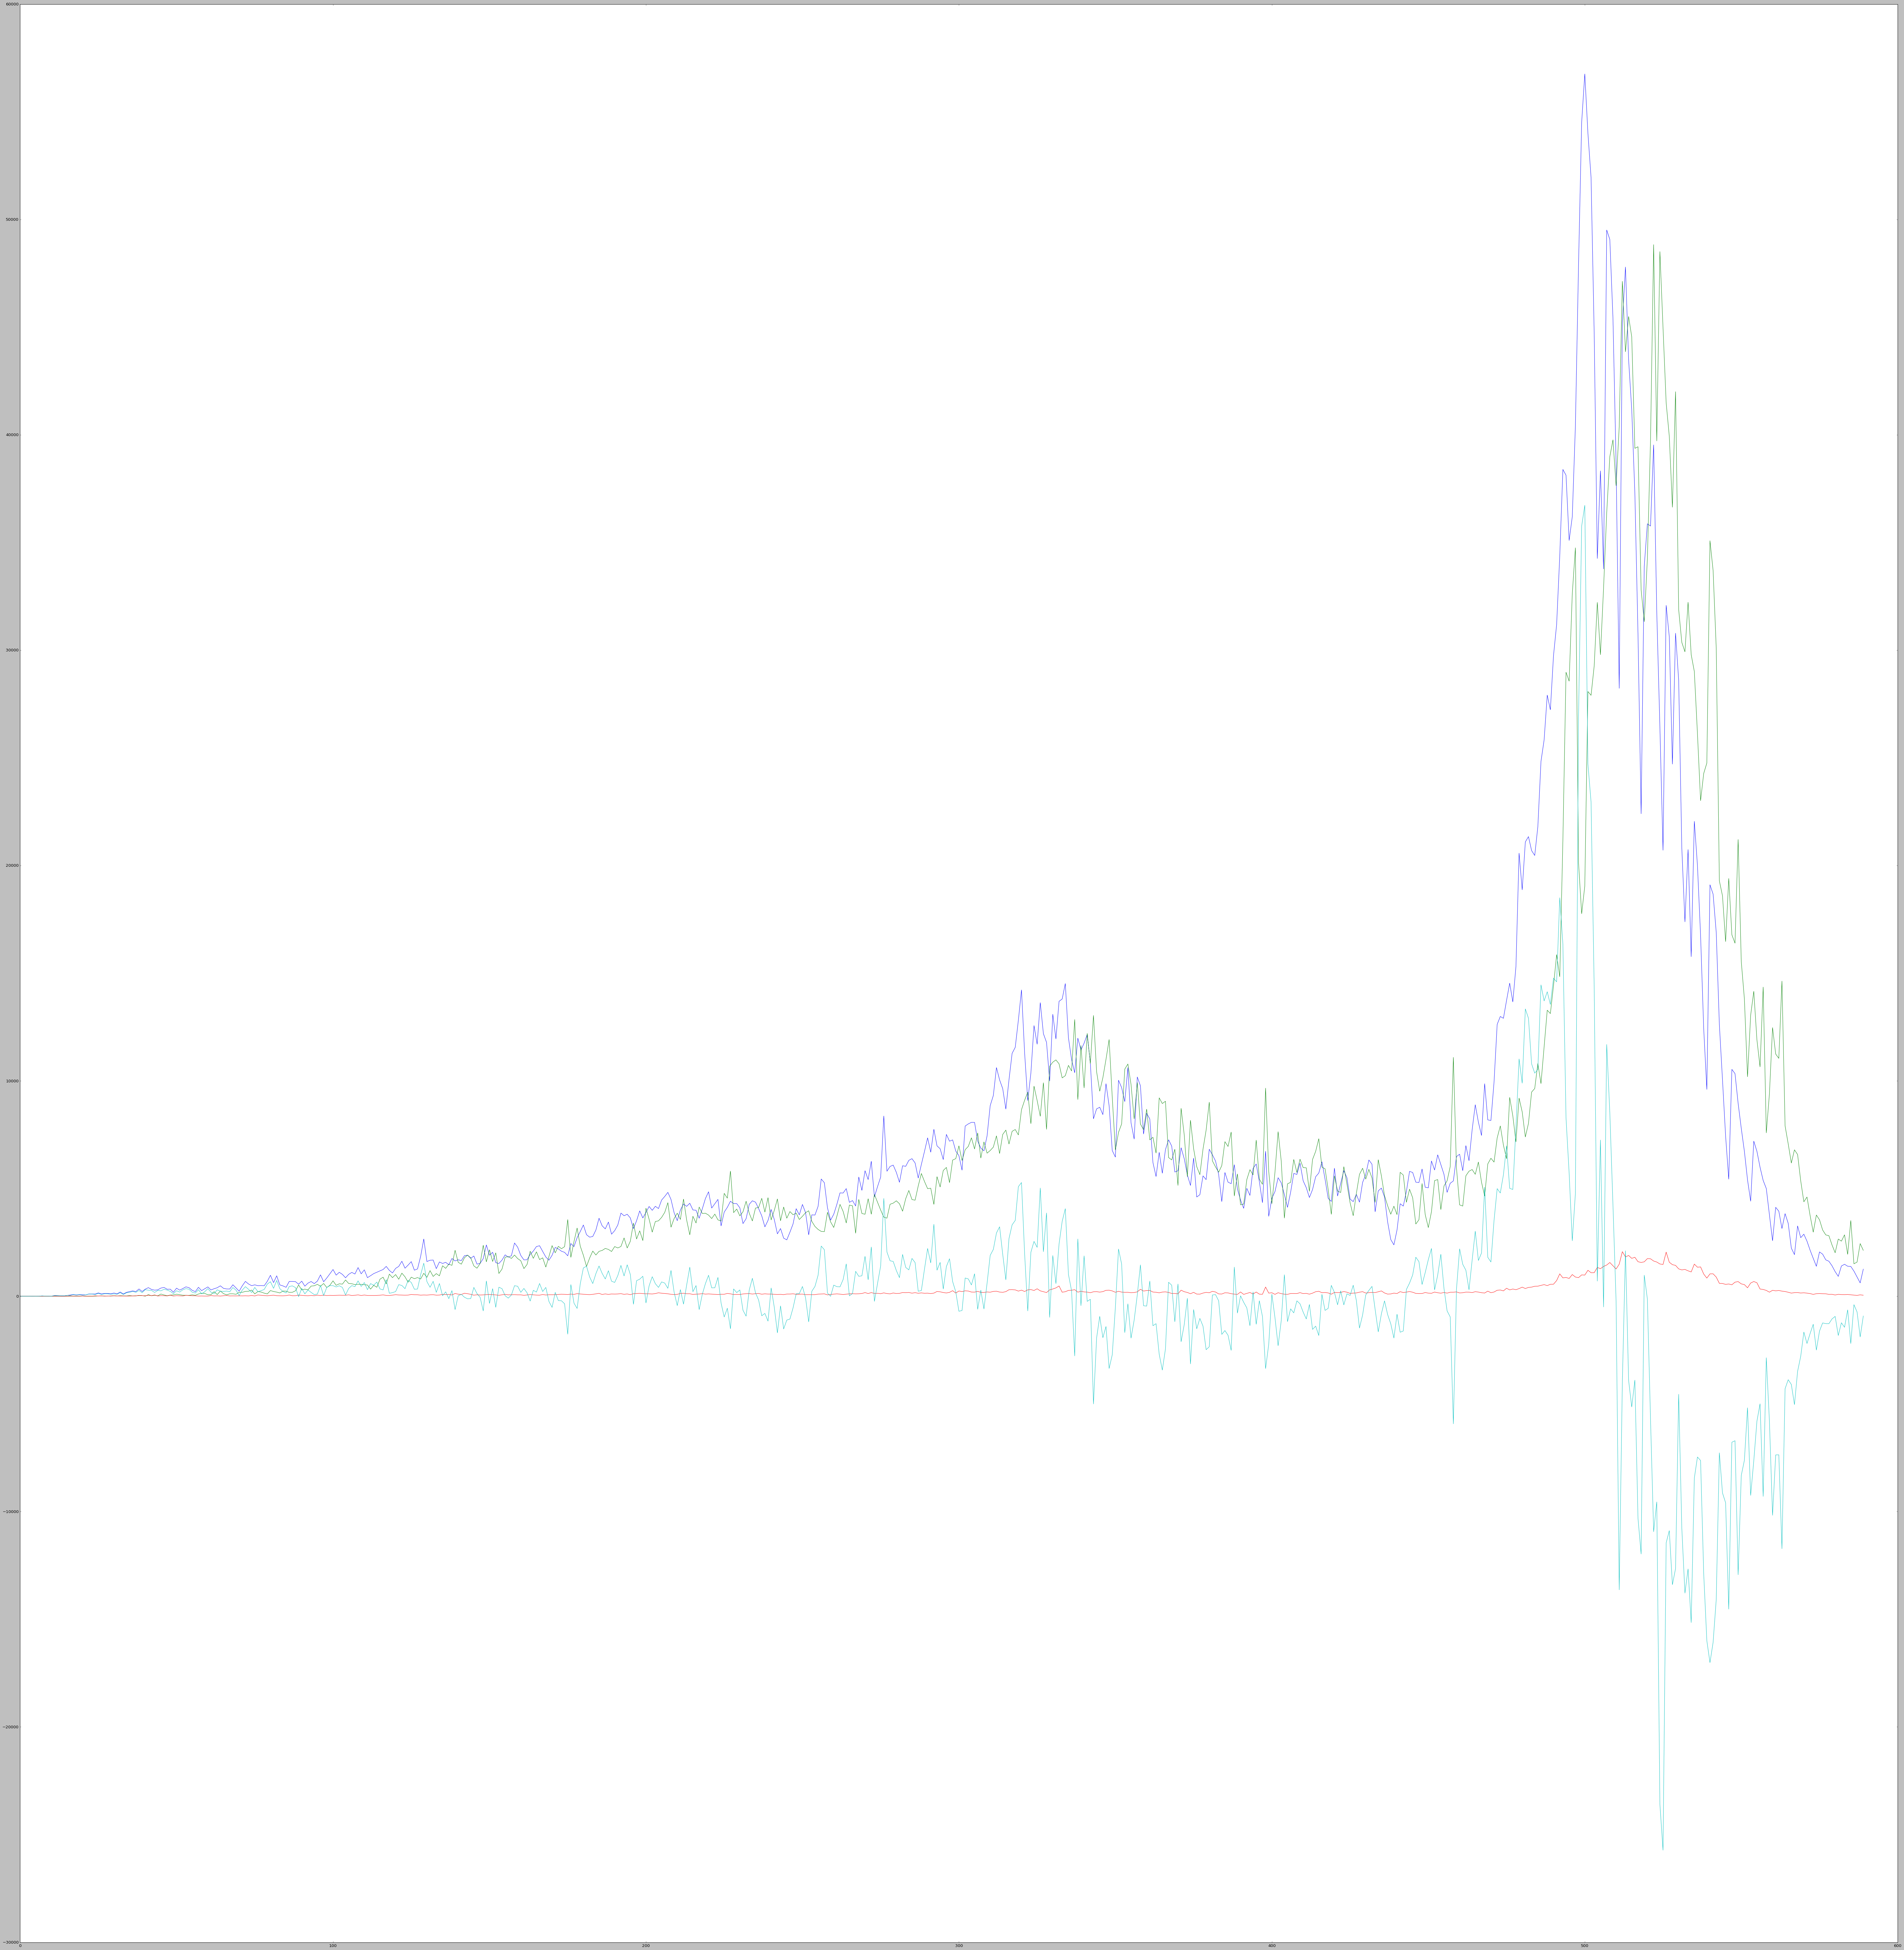

In [87]:
plt.figure(figsize=(100,100))
df_Covid['jumlah_positif'].plot()
df_Covid['jumlah_sembuh'].plot()
df_Covid['jumlah_meninggal'].plot()
df_Covid['jumlah_dirawat'].plot()

<AxesSubplot:>

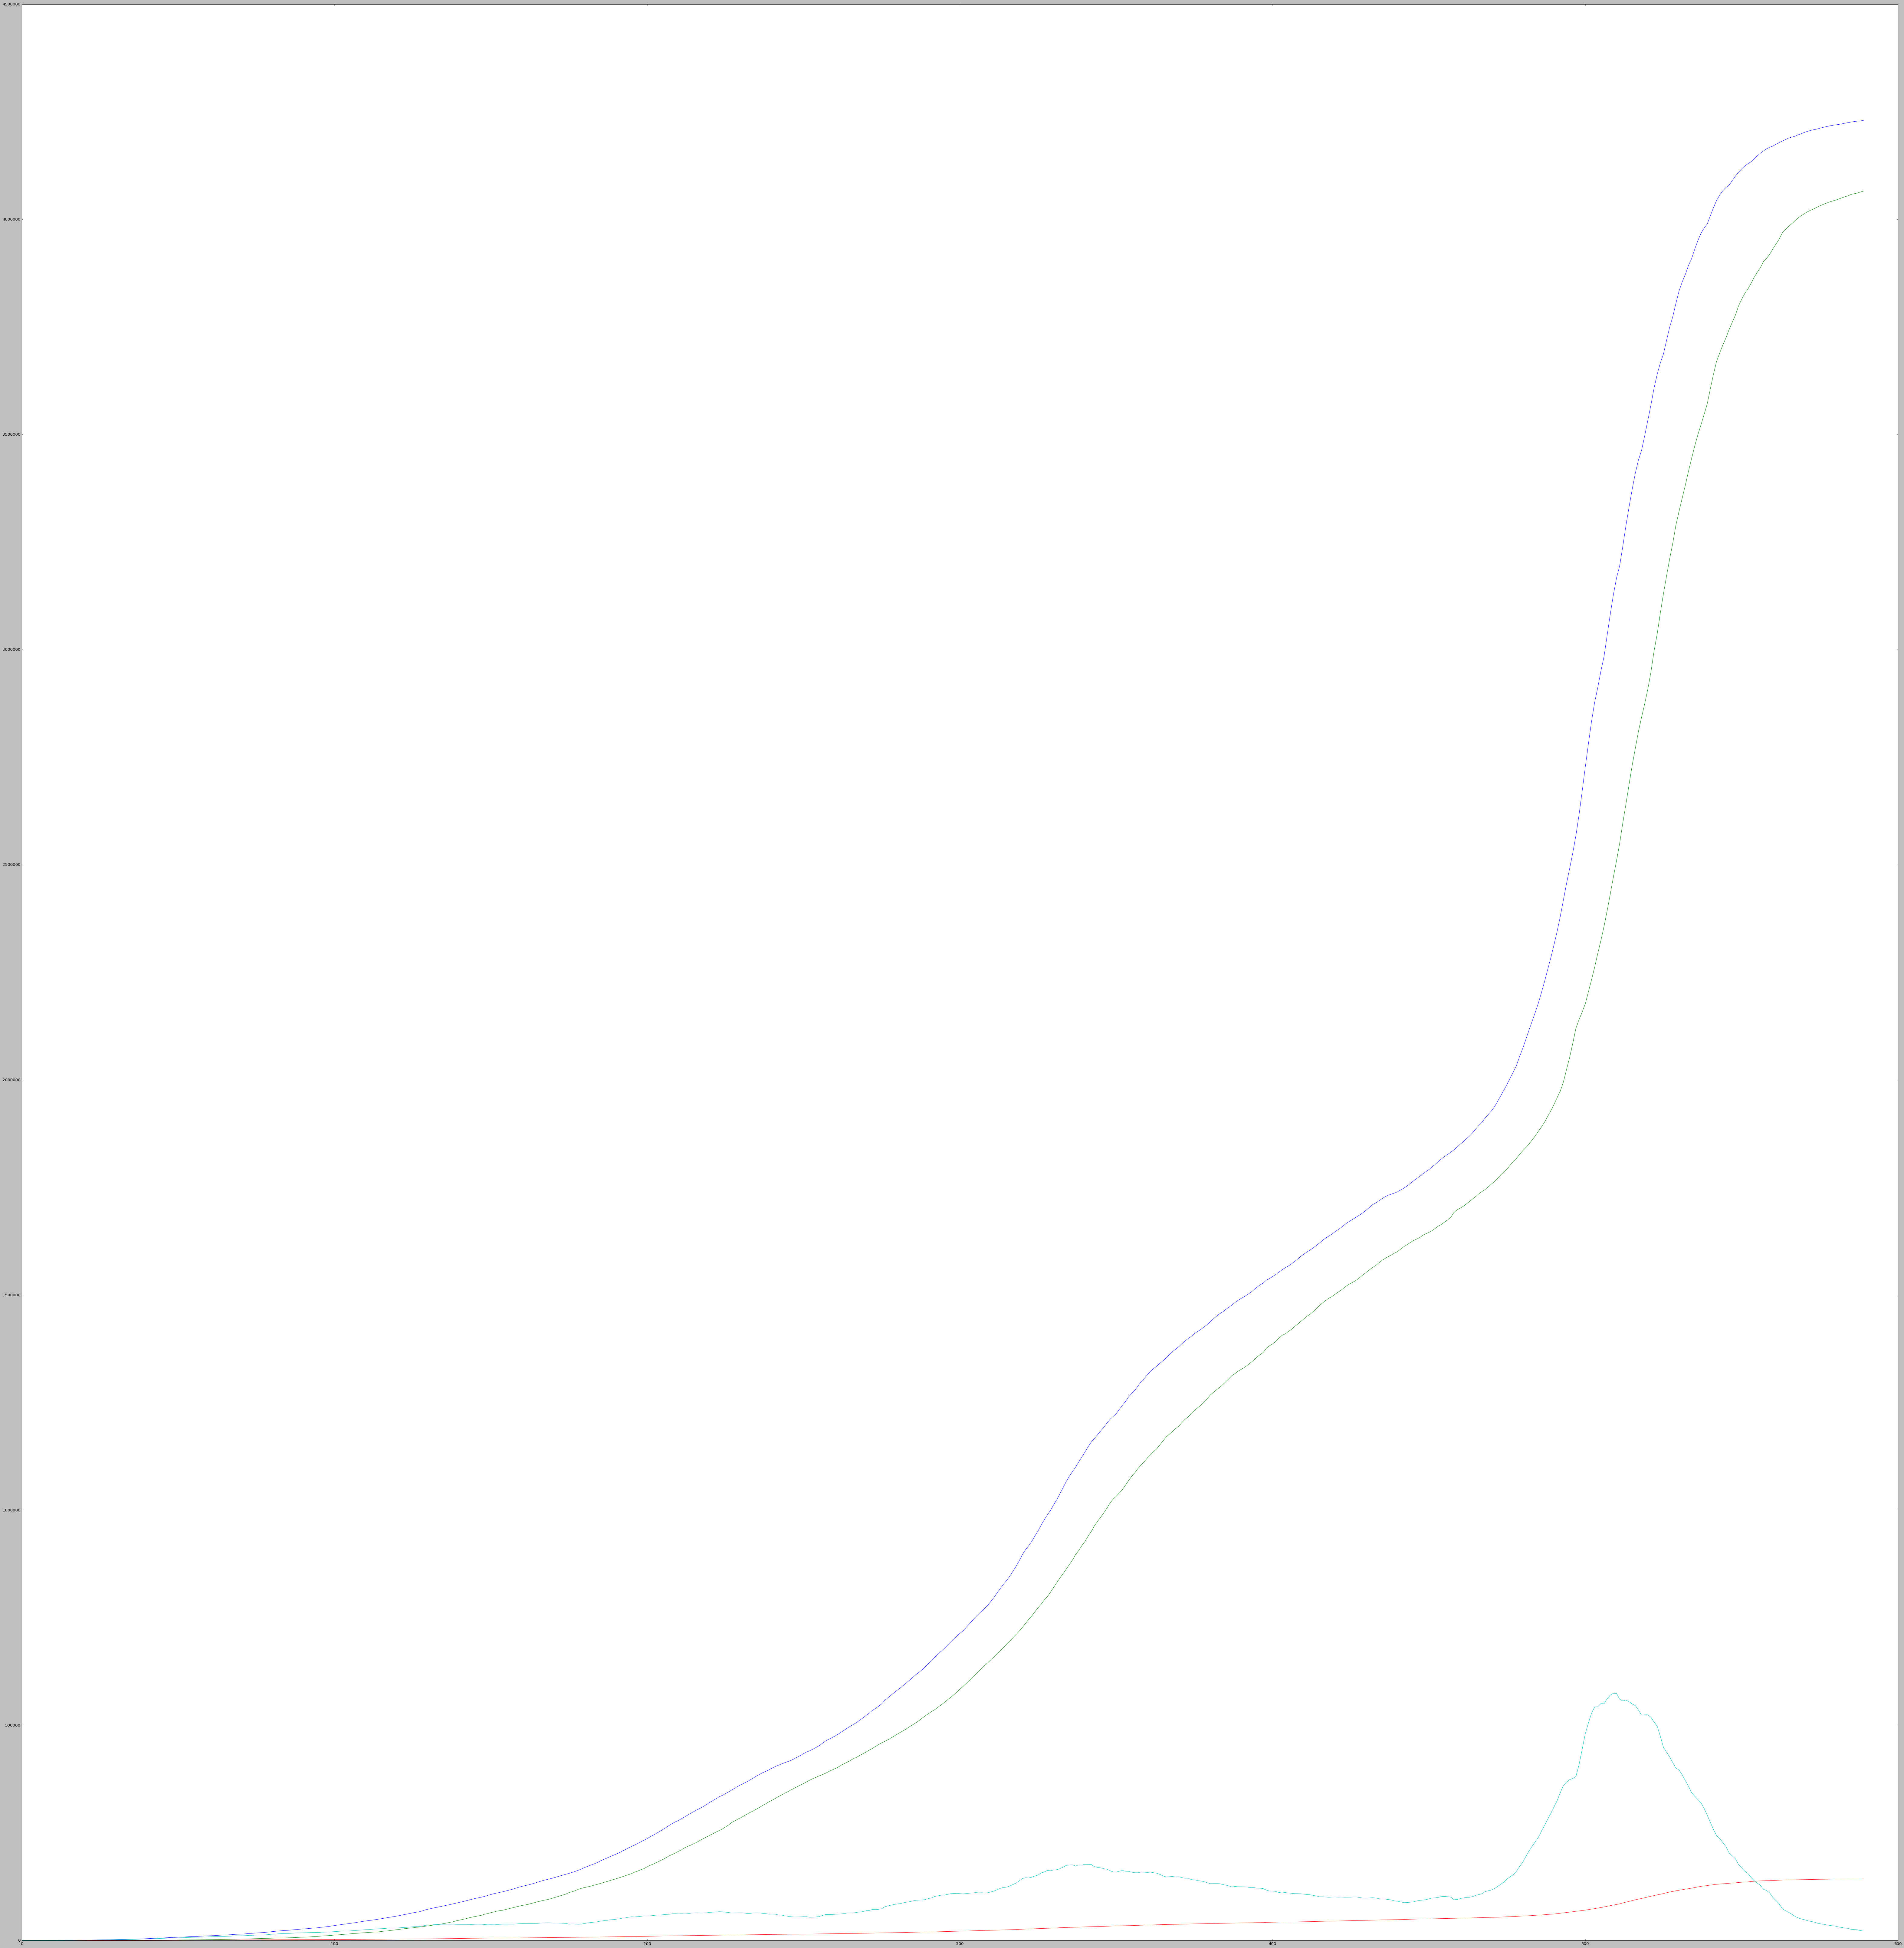

In [86]:
plt.figure(figsize=(100,100))
df_Covid['jumlah_positif_kum'].plot()
df_Covid['jumlah_sembuh_kum'].plot()
df_Covid['jumlah_meninggal_kum'].plot()
df_Covid['jumlah_dirawat_kum'].plot()

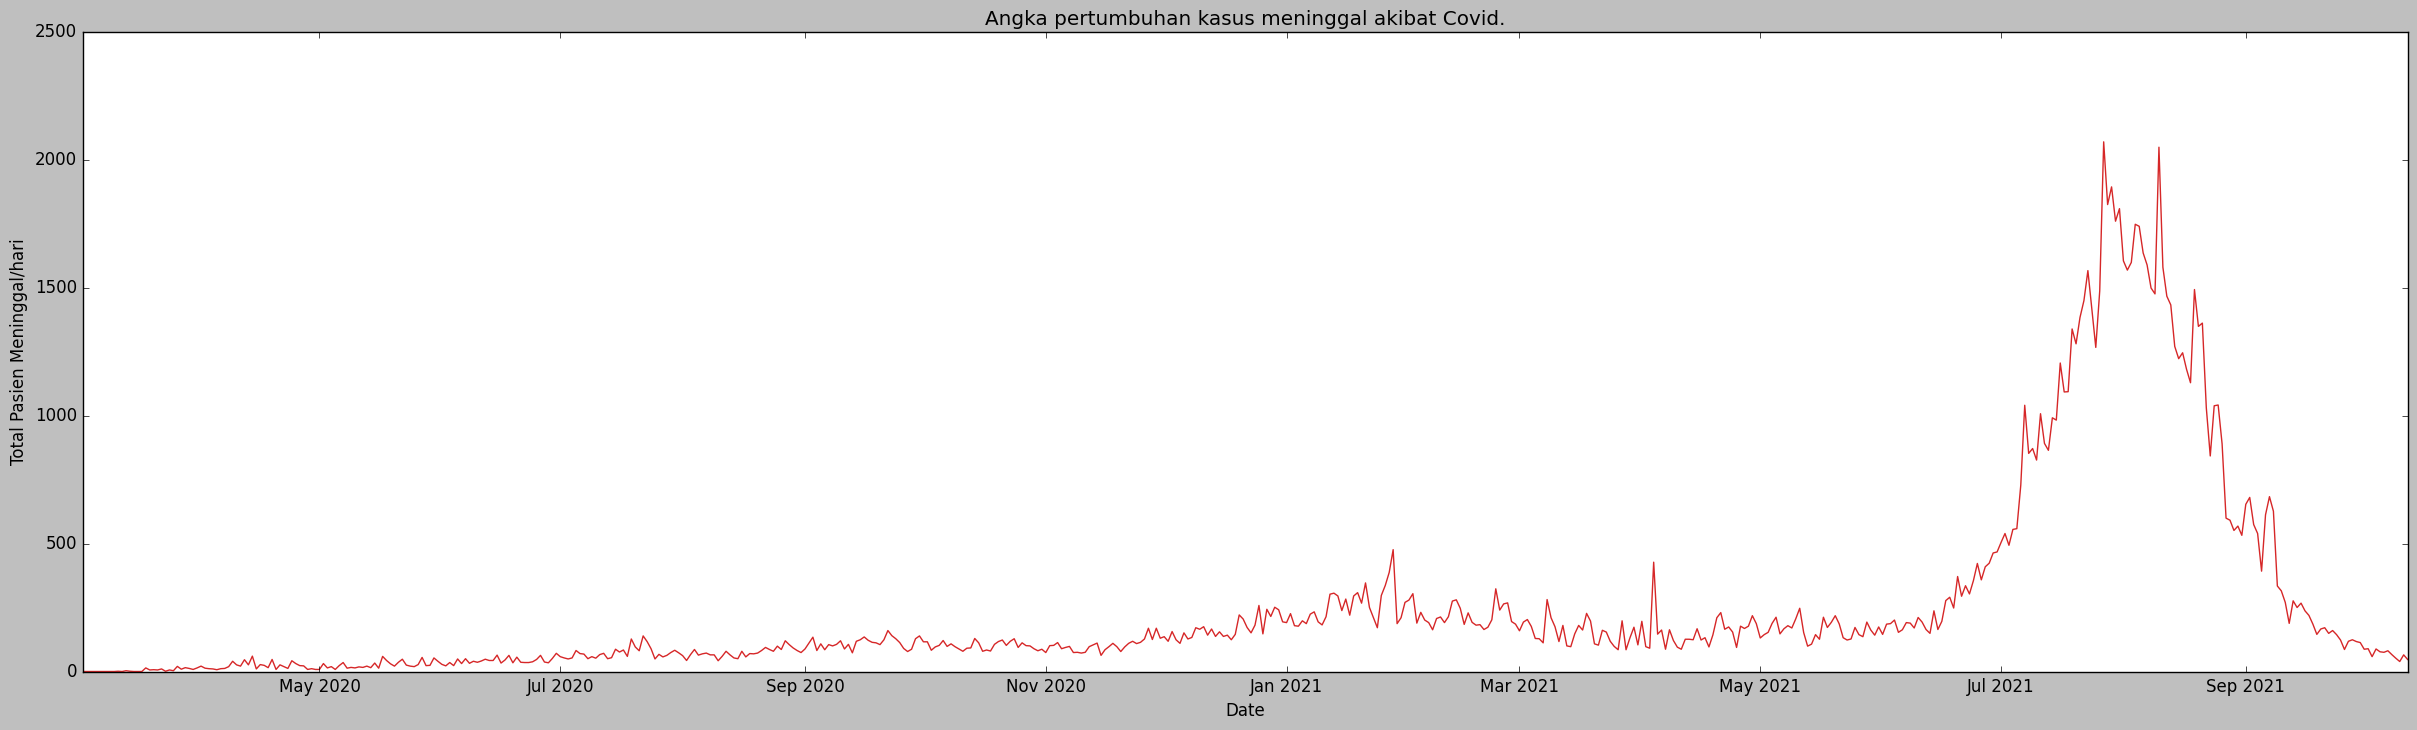

In [91]:
# Time series data source: fpp pacakge in R.
df = pd.read_excel('DataFrame_CovidIndonesia.xlsx', parse_dates=['key_as_string'], index_col='key_as_string')

# Draw Plot Kasus_Meninggal
def plot_df(df, x, y, title="", xlabel='Date', ylabel='Total Pasien Meninggal/hari', dpi=100):
    plt.figure(figsize=(30,8), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

plot_df(df, x=df.index, y=df.jumlah_meninggal, title='Angka pertumbuhan kasus meninggal akibat Covid.')

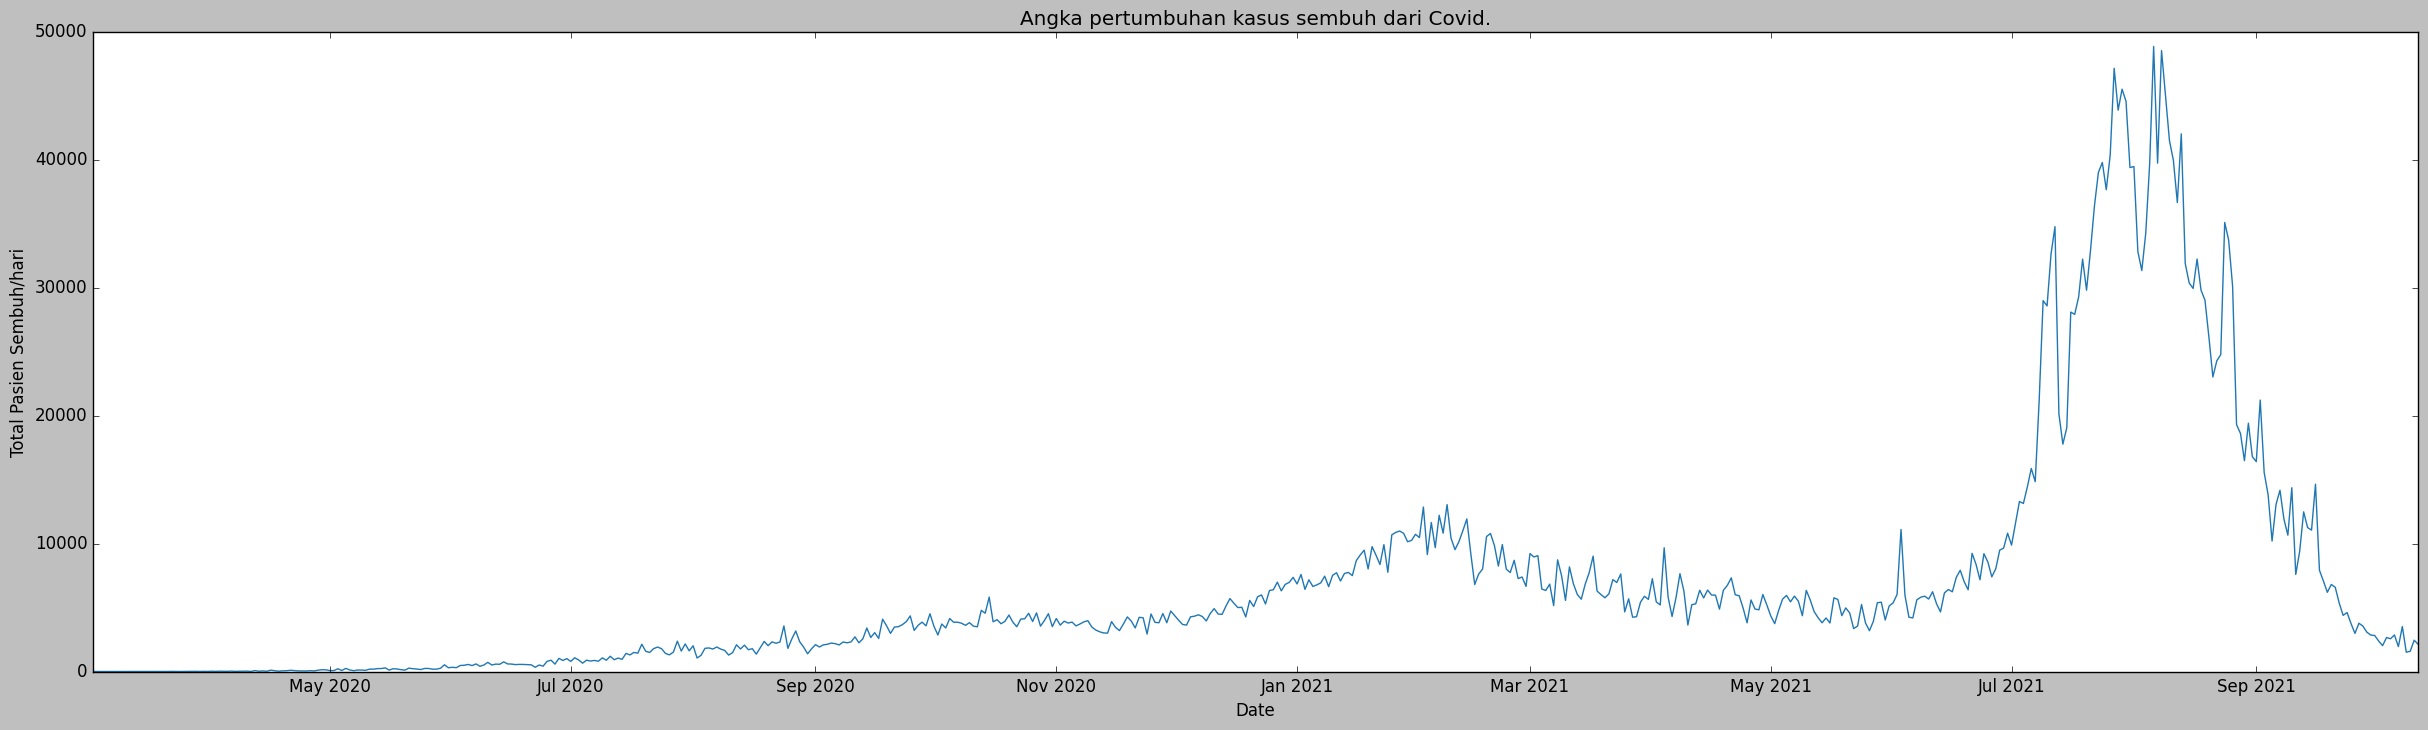

In [95]:
# Draw Plot Kasus_Sembuh
def plot_df(df, x, y, title="", xlabel='Date', ylabel='Total Pasien Sembuh/hari', dpi=100):
    plt.figure(figsize=(30,8), dpi=dpi)
    plt.plot(x, y, color='tab:blue')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

plot_df(df, x=df.index, y=df.jumlah_sembuh, title='Angka pertumbuhan kasus sembuh dari Covid.')

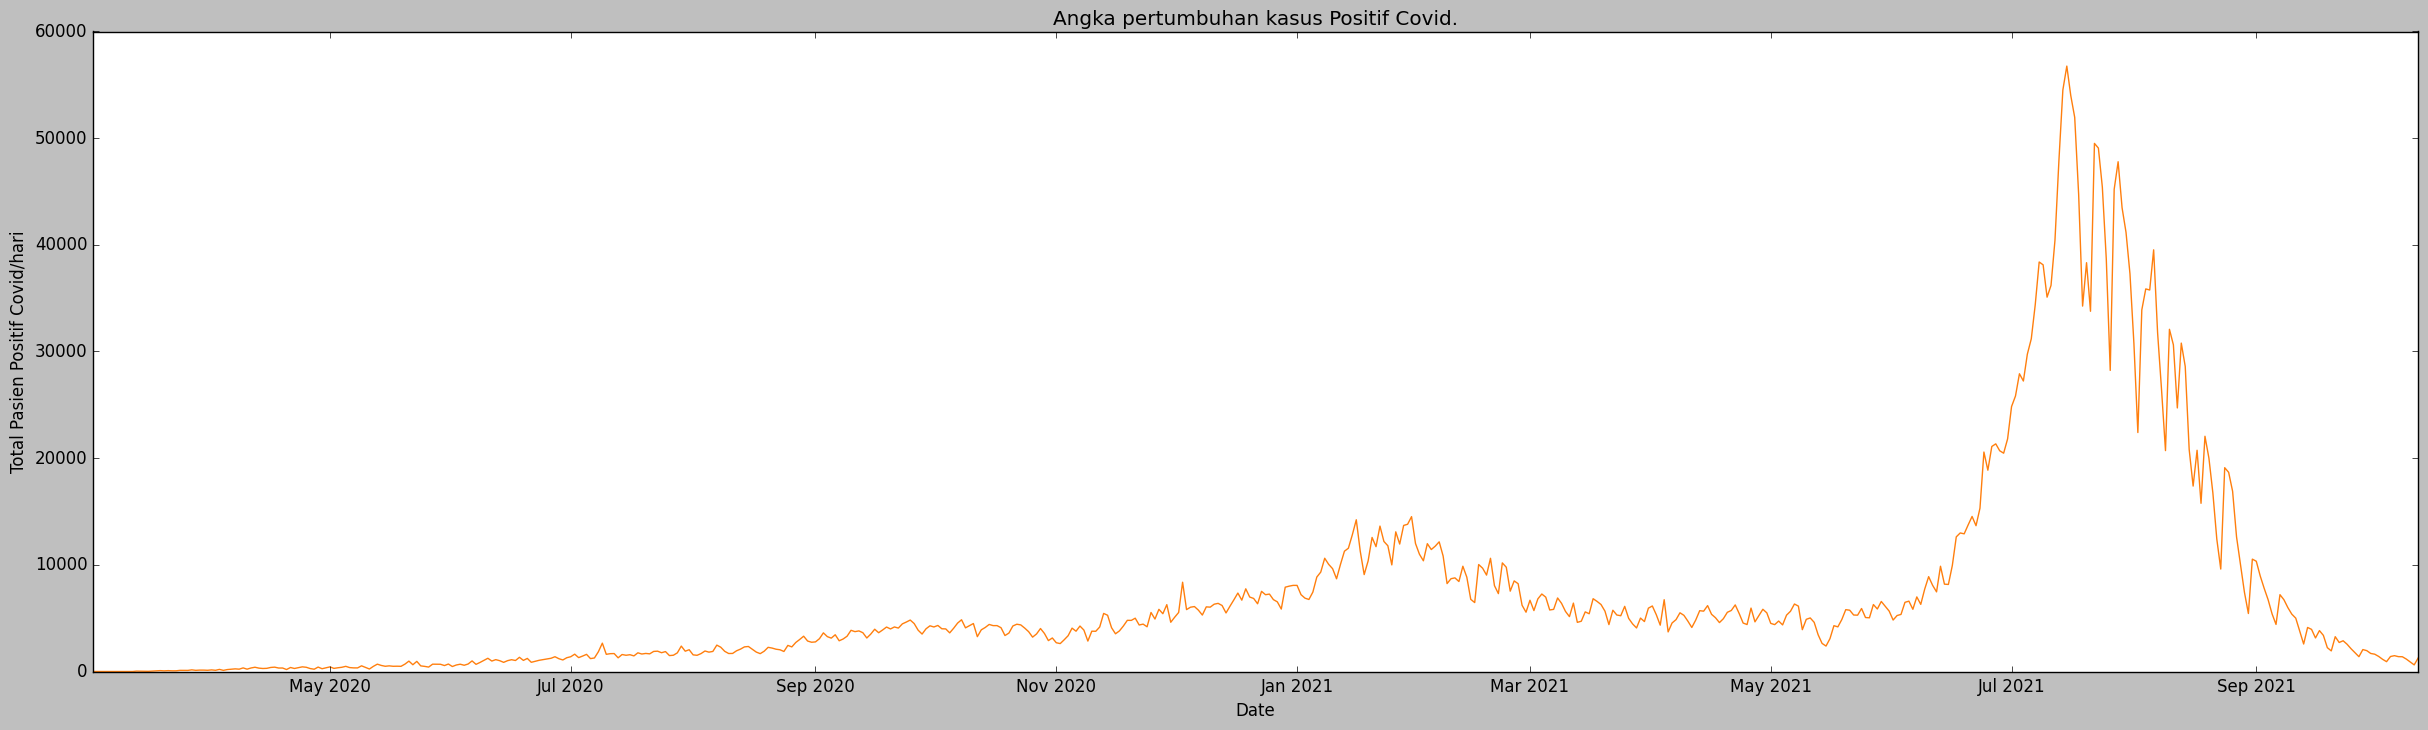

In [96]:
# Draw Plot Kasus_Positif
def plot_df(df, x, y, title="", xlabel='Date', ylabel='Total Pasien Positif Covid/hari', dpi=100):
    plt.figure(figsize=(30,8), dpi=dpi)
    plt.plot(x, y, color='tab:orange')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

plot_df(df, x=df.index, y=df.jumlah_positif, title='Angka pertumbuhan kasus Positif Covid.')

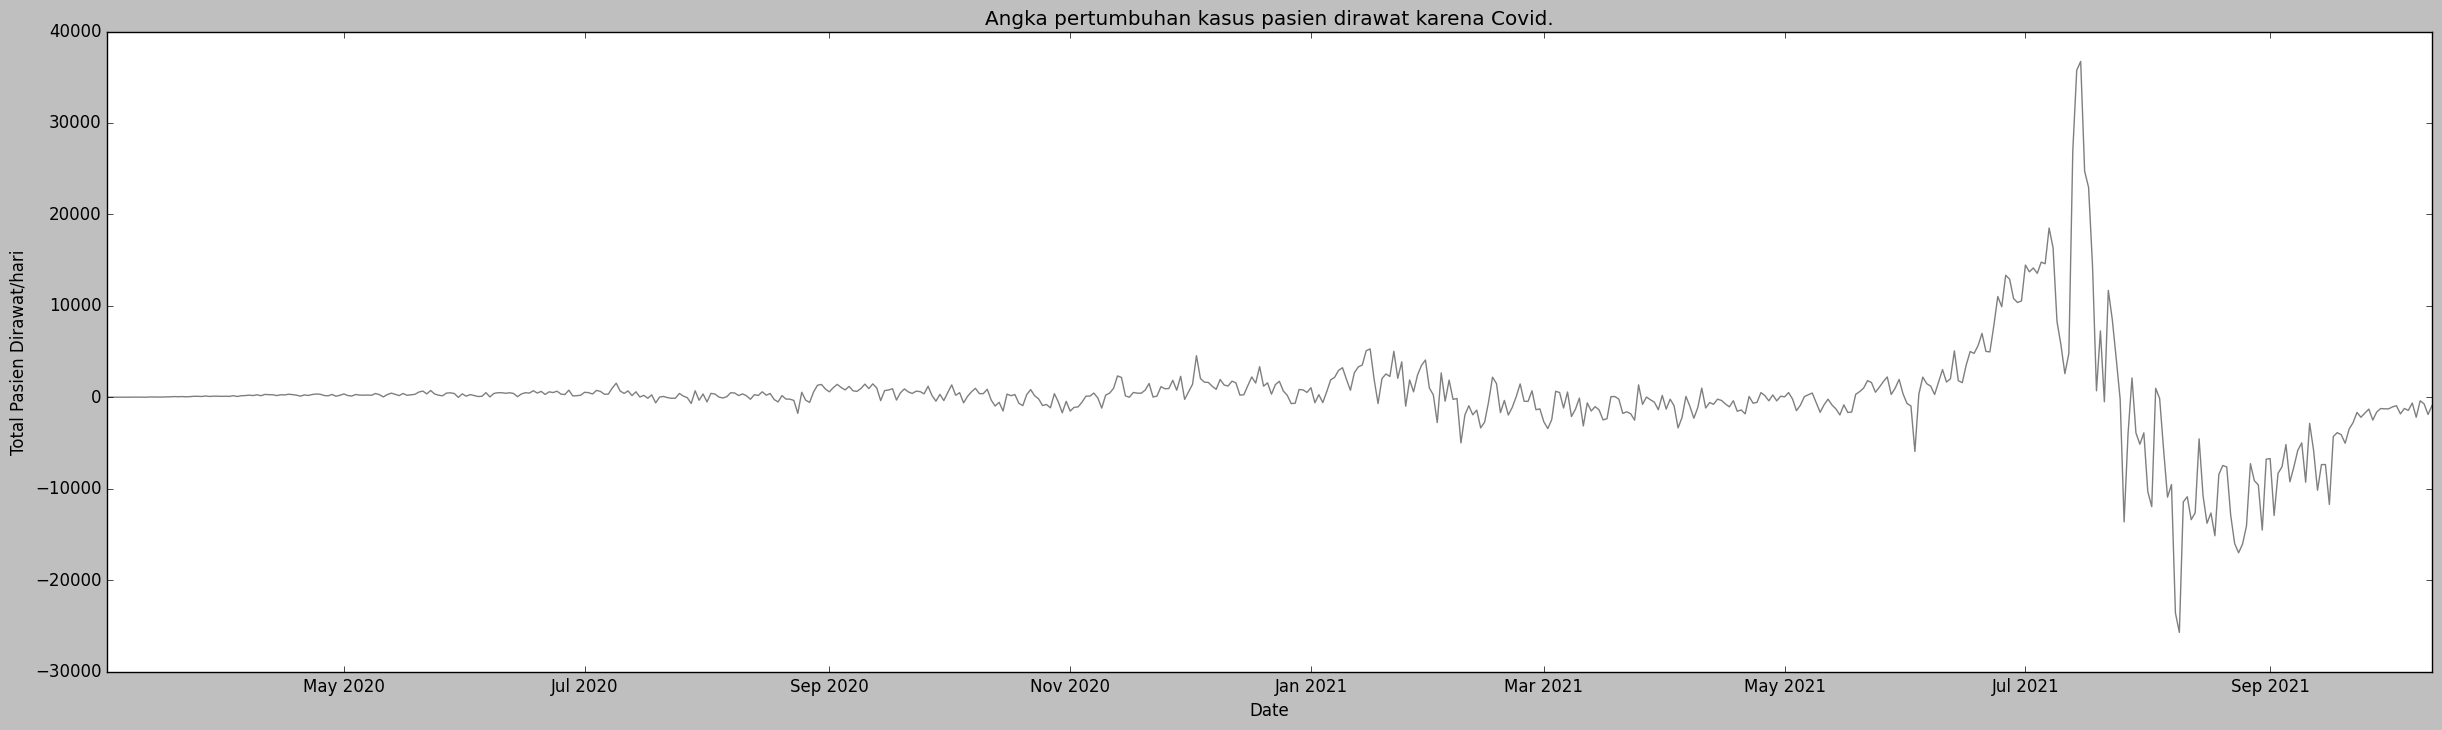

In [97]:
# Draw Plot Kasus_Dirawat
def plot_df(df, x, y, title="", xlabel='Date', ylabel='Total Pasien Dirawat/hari', dpi=100):
    plt.figure(figsize=(30,8), dpi=dpi)
    plt.plot(x, y, color='tab:gray')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

plot_df(df, x=df.index, y=df.jumlah_dirawat, title='Angka pertumbuhan kasus pasien dirawat karena Covid.')